In [22]:
import requests
import json

import numpy as np

import keras
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array, array_to_img

import imgaug.augmenters as iaa
import imgaug as ia
from imgaug.augmentables.segmaps import SegmentationMapsOnImage

import matplotlib.pyplot as plt

#Change by API Endpoint
url = 'https://cityscapeprediction.azurewebsites.net/prediction'

#PATH to your image
#berlin_000003_000019_leftImg8bit.png
#aachen_000000_000019_leftImg8bit.png
#berlin_000005_000019_leftImg8bit.png
IMAGE_PATH = "berlin_000005_000019_leftImg8bit.png"

#Open image
my_img = {'image': open(IMAGE_PATH, 'rb')}

#POST Request
r = requests.post(url, files=my_img)

#Load Server Respond
res = json.loads(r.json()['prediction'])

In [23]:
#Show images with result of our model
def show_result(image, segmap_from_model):
    seq = iaa.Sequential([])
    
    #Convert 0 to 8
    segmap_aug = SegmentationMapsOnImage(segmap_from_model.astype('uint8'), shape=image.shape)
    
    images_aug_i, seg_aug_i = seq(image=image, segmentation_maps=segmap_aug)
    
    res = ia.draw_grid(np.array(seg_aug_i.draw_on_image(images_aug_i.astype('uint8'))), cols=1)
    plt.figure(figsize = (10,10))
    plt.axis('off')
    plt.imshow(res)
    plt.show()
    
    return seg_aug_i.get_arr()

#Combine all the masks together
def combine_mask(masks, dims):
    output = np.empty(dims + (1,))
    
    for x in range(0, masks.shape[0]):
        for y in range(0, masks.shape[1]):
                   target = masks[x][y]
                   output[x][y] = np.argmax(target) 
    return output

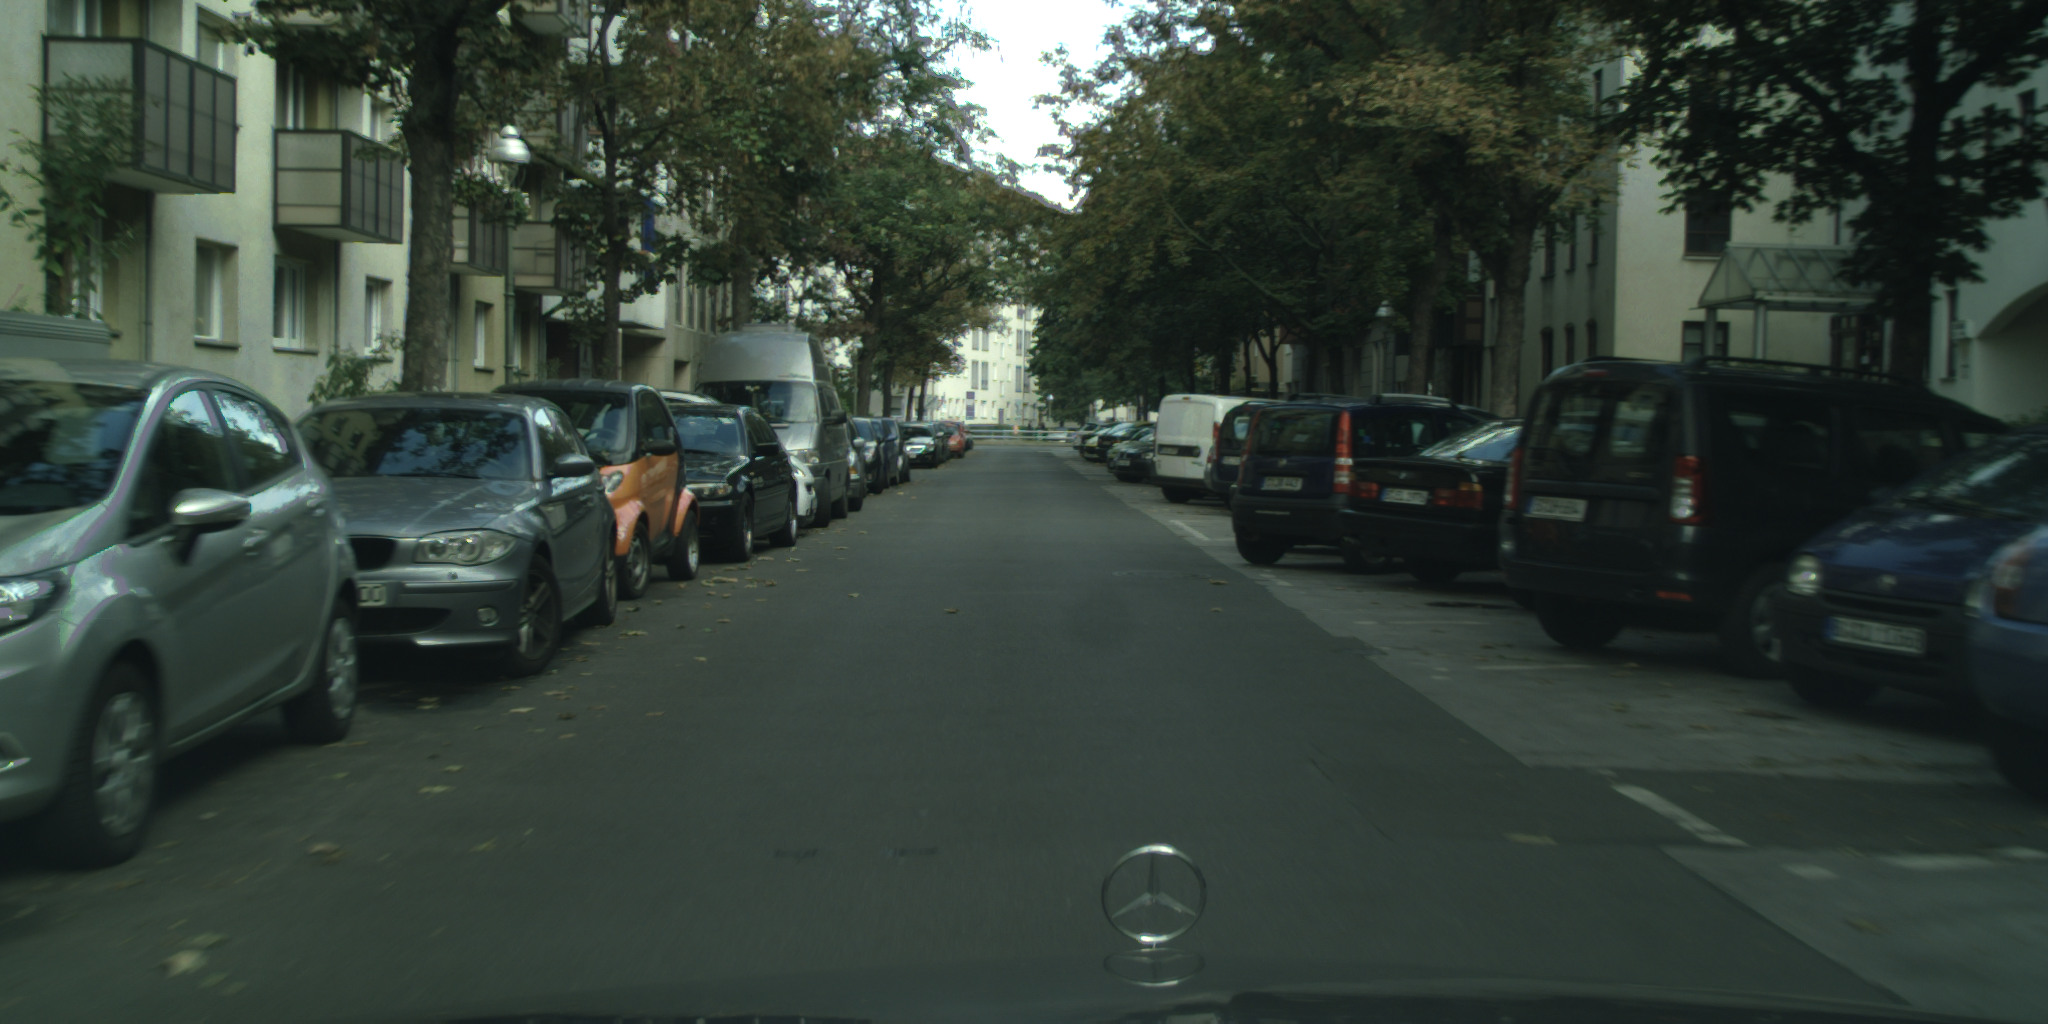

In [24]:
image = load_img(IMAGE_PATH)

array_to_img(
    image, data_format=None, scale=True, dtype=None,
)

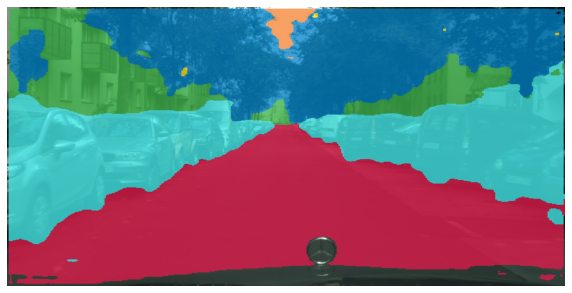

In [25]:
show_result(img_to_array(image), np.array(res).astype('uint8'));